### This notebook will serve as a sandbox for bespoke visualizations for the project

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper 
import warnings
warnings.filterwarnings('ignore')

# load the data
data = pd.read_csv('../data/merged_data.csv')

data.shape

(1917, 424)

### Build a Dataframe with Time Series for Plotting
- We will create a multi-layered plot that shows insight on patient population treatment response
- To create a multi-layered plot, we will create 3 different series, representing:
    - Total Positive Test Rates for Patient Population
    - Total Negative Test Rates for Methadone Patient Group
    - Total Negative Test Rates for Buprenorphine Patient Group
<br><br>
We will create a bar plot for the total positive test rates and line plots for the negative test rates for each patient group<br>

In [2]:
# create the test dataframe, use list comprehension to call all columns that start with 'test_Opiate300'
# then add the medication column at the end to filter the data
tests = data[[col for col in data.columns if col.startswith('test_Opiate300')]+['medication']]

# remove the column names to create a test matrix with numbers for columns
tests.columns = tests.columns.str.replace('test_Opiate300_', '')

# there is a value -5 which indicates test results unclear
# count how many times -5 occurs in tests and compare to dataset
tests[tests == -5].count().sum()/tests.size

# the total accounts for .005 of the data, so we can update these to 0
# better not to skew the positive test data as the % of -5 is so low
for col in tests.columns:
    tests[col] = tests[col].replace(-5, 0)

# create methadone test group
methadone = tests[tests['medication'] == 1.0]

# slice off the final column, aggregate cols with mean 
# transform to series and rename column to patient group
methadone = methadone.iloc[:, :-1].sum().to_frame('methadone_group')

# create buprenorphine test group
buprenorphine = tests[tests['medication'] == 2.0]

# slice off the final column, aggregate cols with mean 
# transform to series and rename column to patient group
buprenorphine = buprenorphine.iloc[:, :-1].sum().to_frame('buprenorphine_group')

# merge series
test_results = pd.concat([methadone, buprenorphine], axis=1)

# create total column, mean of both test groups
test_results['total'] = (test_results['methadone_group'] + test_results['buprenorphine_group'])

test_results

,methadone_group,buprenorphine_group,total
0,725.0,953.0,1678.0
1,624.0,759.0,1383.0
2,594.0,754.0,1348.0
3,594.0,765.0,1359.0
4,568.0,759.0,1327.0
5,570.0,775.0,1345.0
6,596.0,797.0,1393.0
7,579.0,807.0,1386.0
8,568.0,791.0,1359.0
9,582.0,828.0,1410.0


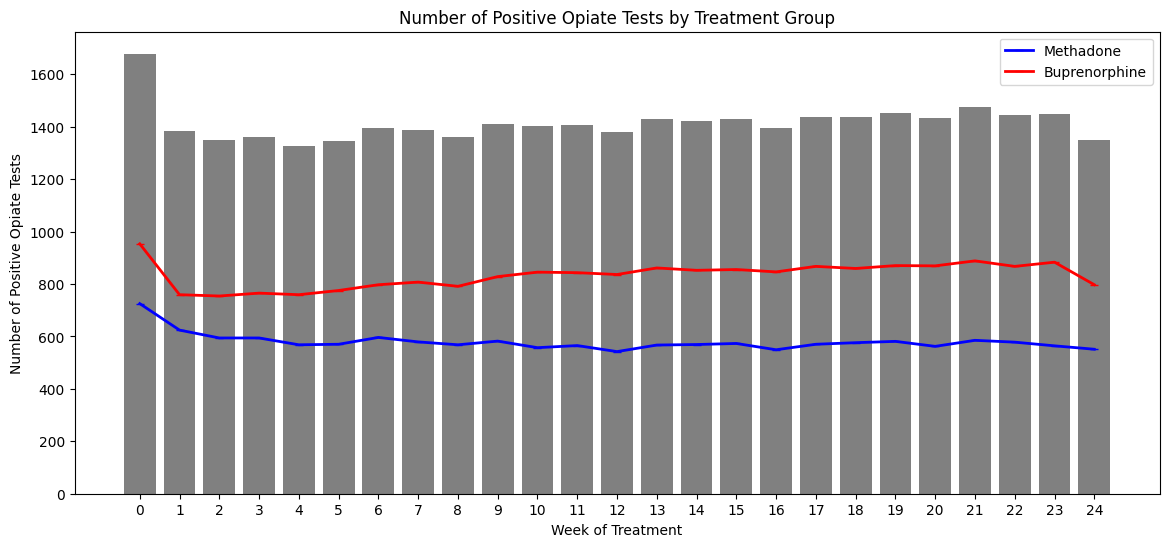

In [13]:
# Adjusted code to ensure colors show up in the legend
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x=test_results.index, y=test_results.total, color='grey', ax=ax)

# Use ax.plot for consistency with seaborn's ax
ax.plot(np.array(methadone.index), np.array(methadone.methadone_group), marker='_', color='blue', linewidth=2, label='Methadone')
ax.plot(np.array(buprenorphine.index), np.array(buprenorphine.buprenorphine_group), marker='_', color='red', linewidth=2, label='Buprenorphine')

# Create legend to the right, outside of the plot, using ax.legend for consistency
ax.legend(loc='upper right')

# Set the title and labels
ax.set_title('Number of Positive Opiate Tests by Treatment Group')
ax.set_xlabel('Week of Treatment')
ax.set_ylabel('Number of Positive Opiate Tests');

Text(0.5, 0, 'Week of Treatment')

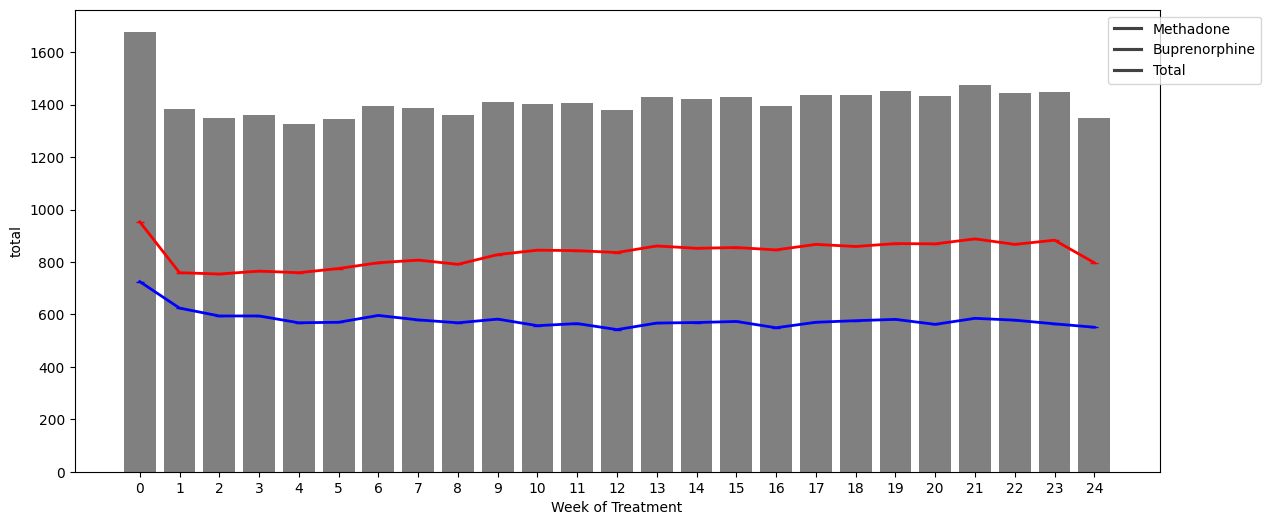

In [9]:

# create a layered bar plot, with 2 line plots overlayed
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x=test_results.index,y=test_results.total, color='grey', ax=ax)

# plot the methadone group
plt.plot(np.array(methadone.index), np.array(methadone.methadone_group), marker='_', color='blue', linewidth=2)
# plot the buprenorphine group
plt.plot(np.array(buprenorphine.index), np.array(buprenorphine.buprenorphine_group), marker='_', color='red', linewidth=2)
# create legend to the right, outside of the plot
plt.legend(['Methadone', 'Buprenorphine', 'Total'], loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.xlabel('Week of Treatment')

In [4]:
tests

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,medication
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
1914,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


In [5]:
tests.size

49842